<h2>D209 - Data Mining -  TASK 1: CLASSIFICATION ANALYSIS</h2>

Jonathon "Jon” Fryman<br>
Data Analytics 01/01/2022<br>
Student ID 000974544<br>
Program Mentor: Lea Yoakem<br>
C: 419-206-6989 (ET)<br>
jfryma1@wgu.edu<br>

<h3>Part I: Research Question</h3>

<h3>A.  Describe the purpose of this data mining report by doing the following:</h3>

<h3>A1.  Propose one question relevant to a real-world organizational situation that you will answer using one of the following classification methods:</h3>


Can the segment of the customer base most likely to enroll in the StreamingMovies service offering be ascertained from the currently available data?

<h3>A2. Define one goal of the data analysis.</h3>

The goal of the stated research question is to locate patterns within the dataset  in relation to a customers StreamingMovies status in correlation to the customers MonthlyCharge', 'Bandwidth_GB_Year', 'Age', and Streaming_TV classification status. This will allow us to better understand trends on the customer base for this specifically segmented product offering. 

<h3>Part II: Method Justification</h3>

<h3>B.  Explain the reasons for your chosen prediction method from part A1 by doing the following:</h3>

<h3>B1.  Explain how the prediction method you chose analyzes the selected data set. Include expected outcomes.</h3>

The classsification method used, k-Nearest Neighbors, creates bounderies to classify the data. When the model receives a new data point, the algorithm attempts to predict the most appropriate classification of the dependent variable based on the nearest boundary line.

<h3>B2.  Summarize one assumption of the chosen prediction method.</h3>

K Nearest Neighbors is known as a non-parametric lazy learning algorithm. When referring to a non-parametric technique, it is implied that there are no pre-existing assumptions made regarding the underlying data and hows it's distributed.

<h3>B3.  List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.</h3>

The following Python libraries and packages will be utilized throughout the included analysis:

<ul>
    <li><strong>Pandas</strong> - A fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language</li>
    <li><strong>Numpy</strong> - Offers comprehensive mathematical functions, random number generators, linear algebra routines</li> 
    <li><strong>Matplotlib</strong> - A comprehensive library for creating static, animated, and interactive visualizations</li>
    <li><strong>scikit-learn</strong> - Simple and efficient tools for predictive data analysis</li>
        <ul>
            <li><strong>Neighbors</strong> - implements the k-nearest neighbors algorithm.</li>
                <ul>
                    <li><strong>KNeighborsClassifier</strong> - Classifier implementing the k-nearest neighbors vote</li>
            </ul>
            <li><strong>Metrics</strong> - Implements several loss, score, and utility functions to measure classification performance</li>
                <ul>
                    <li><strong>mean_squared_error</strong> - Calculates mean squared error regression loss</li>
                    <li><strong>accuracy_score</strong> - In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
</li>
                    <li><strong>roc_auc_score</strong> - Computes area under the receiver operating characteristic curve (ROC AUC) from prediction scores</li>
                    <li><strong>classification_report</strong> - Builds a text report showing the main classification metrics.</li>
                    <li><strong>confustion_matrix</strong> - Compute confusion matrix to evaluate the accuracy of a classification.</li>
                </ul>
            <li><strong>Model_selection</strong></li>
                <ul>
                    <li><strong>train_test_split</strong> - Split arrays or matrices into random train and test subsets.</li>
                    <li><strong>GridSearchCV</strong> - Exhaustive search over specified parameter values for an estimator.</li>
                    <li><strong>cross_val_score</strong> - Used to evaluate a score by cross-validation.
                </ul>
            <li><strong>Preprocessing</strong> - Provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.
</li>
                <ul>
                    <li><strong>MinMaxScaler</strong> - Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.</li>
                    <li><strong>StandardScaler</strong> - Standardizes features by removing the mean and scaling to unit variance.</li>
                </ul>
        </ul>
    
</ul>

In [1]:
# importing required libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error as MSE, confusion_matrix, classification_report, roc_auc_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import MinMaxScaler, StandardScaler

<h3>Part III: Data Preparation</h3>

<h3>C.  Perform data preparation for the chosen data set by doing the following:</h3>

<h3>C1.  Describe one data preprocessing goal relevant to the prediction method from part A1.</h3>

Data preprocessing for K Nearest Neighbors necessitates removing outlier values for the independent variables selected for inclusion in the prediction model. After reviewing the data, there were no identified outliers within the selected variables that were egregiously off scale from the remainder of the records. 

As previously stated, this was the case for the Population attribute and corrected within this Jupyter notebook. However, Population was not selected for inclusion within our prediction model.

<h3>C2.  Identify the initial data set variables that you will use to perform the analysis for the prediction question from part A1, and group each variable as continuous or categorical. </h3>
<h4>All Variables</h4>
<ul>
    <li>StreamingTV</li>
    <li>MonthlyCharge</li>
    <li>Age</li>
    <li>Bandwidth_GB_Year</li>
    <li>StreamingMovies</li>
</ul>
<h4>Numeric</h4>
<ul>
    <li>MonthlyCharge</li>
    <li>Bandwidth_GB_Year</li>
    <li>Age</li>
</ul>

<h4>Categorical</h4>
<ul>
   <li>StreamingTV</li>
   <li>StreamingMovies</li>
</ul>

<h3>C3.  Explain the steps used to prepare the data for the analysis. Identify the code segment for each step.</h3>

The primary steps performed prior to analysis consisted of the following items:

<ul>
    <li>Reading in the csv file using Pandas</li>
    <li>The columns named Item1-Item8 were renamed to better align with the variable's description</li>
    <li>Confirmed the dataset did not contain any null or missing values</li>
    <li>Corrected population values for records representing a 0 population value</li>
    <li>Created a list containing the variables to be included for analysis with the model</li>
    <li>Created dummy variables to convert categorical variables to numeric </li>
    <li>Renamed dummy variables back to original variable name in numeric form</li>
</ul>

This steps can be seen in the cells below with annotation identifying with cell performs which step included in the list above.

In [2]:
# importing churn csv as pandas dataframe
churn_df = pd.read_csv('churn_clean.csv')

# Updating column names to reflect title
churn_df.rename(columns = {'Item1':'TimelyResponse',
                    'Item2':'TimelyFixes',
                    'Item3':'TimelyReplacements',
                    'Item4':'Reliability',
                    'Item5':'Options',
                    'Item6':'RespectfulResponse',
                    'Item7':'CourteousExchange',
                    'Item8':'EvidenceActiveListening'}, inplace=True)

In [3]:
# Counting null values for all columns
count_nan = churn_df.isnull().sum()
print(count_nan)

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

In [4]:
# confirming if any values are missing or null
churn_df.isna().any()

CaseOrder                  False
Customer_id                False
Interaction                False
UID                        False
City                       False
State                      False
County                     False
Zip                        False
Lat                        False
Lng                        False
Population                 False
Area                       False
TimeZone                   False
Job                        False
Children                   False
Age                        False
Income                     False
Marital                    False
Gender                     False
Churn                      False
Outage_sec_perweek         False
Email                      False
Contacts                   False
Yearly_equip_failure       False
Techie                     False
Contract                   False
Port_modem                 False
Tablet                     False
InternetService            False
Phone                      False
Multiple  

In [5]:
# Summary Statistics for all numerical variables contained in initial DataSet
churn_df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,RespectfulResponse,CourteousExchange,EvidenceActiveListening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [6]:
# generating list of all original columns in dataframe
list(churn_df.columns)

['CaseOrder',
 'Customer_id',
 'Interaction',
 'UID',
 'City',
 'State',
 'County',
 'Zip',
 'Lat',
 'Lng',
 'Population',
 'Area',
 'TimeZone',
 'Job',
 'Children',
 'Age',
 'Income',
 'Marital',
 'Gender',
 'Churn',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Techie',
 'Contract',
 'Port_modem',
 'Tablet',
 'InternetService',
 'Phone',
 'Multiple',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'PaymentMethod',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'TimelyResponse',
 'TimelyFixes',
 'TimelyReplacements',
 'Reliability',
 'Options',
 'RespectfulResponse',
 'CourteousExchange',
 'EvidenceActiveListening']

In [7]:
# creating list of unique areas
a = churn_df['Area'].unique()

# creating empty area dictionary
ad = {}

# Creating dictionary associating area with median population
for i in a:
    ad[i] = churn_df.loc[churn_df['Area'] == i]['Population'].mean()
    
# assign mean population for area to records with 0 for population value
for key, value in ad.items():
    churn_df.loc[(churn_df['Population'] == 0) & (churn_df['Area'] == key), 'Population'] = value    

In [8]:
# summary statistics for initial DataFrame
churn_df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,RespectfulResponse,CourteousExchange,EvidenceActiveListening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9851.073089,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14400.373732,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,2.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,782.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,3064.000000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [9]:
# seperating features that will be used in model
features = ['MonthlyCharge', 'Bandwidth_GB_Year','StreamingMovies', 'StreamingTV', 'Age']

In [10]:
# Creating dummy variables
df_dummies = pd.get_dummies(churn_df[features], drop_first = True)
# generating list of all columns in dummies dataframe
list(df_dummies.columns)

['MonthlyCharge',
 'Bandwidth_GB_Year',
 'Age',
 'StreamingMovies_Yes',
 'StreamingTV_Yes']

In [11]:
# Updating column names after converting to dummy variable value
df_dummies.rename(columns = {'StreamingMovies_Yes':'StreamingMovies',
                             'StreamingTV_Yes':'StreamingTV'}, inplace=True)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MonthlyCharge      10000 non-null  float64
 1   Bandwidth_GB_Year  10000 non-null  float64
 2   Age                10000 non-null  int64  
 3   StreamingMovies    10000 non-null  uint8  
 4   StreamingTV        10000 non-null  uint8  
dtypes: float64(2), int64(1), uint8(2)
memory usage: 254.0 KB


In [12]:
print(churn_df.keys())

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'TimelyResponse', 'TimelyFixes',
       'TimelyReplacements', 'Reliability', 'Options', 'RespectfulResponse',
       'CourteousExchange', 'EvidenceActiveListening'],
      dtype='object')


<h3>C4.  Provide a copy of the cleaned data set.</h3>

In [13]:
# Exporting full cleaned dataframe to csv
churn_df.to_csv('churn_df.csv', index=False)

# Exporting full cleaned dataframe with dummies to csv
df_dummies.to_csv('df_dummies.csv', index=False)

<h3>Part IV.  Analysis</h3>

<h3>D.  Perform the data analysis and report on the results by doing the following:</h3>

<h3>D1.  Split the data into training and test data sets and provide the file(s).</h3>

The following cells of annotated code contain the steps to separate the selected features to use for analysis, followed by creating train test data using the sklearn.model_selection train_test_split package for seperation. 

Files containing the seperated datasets have been exported for review as shown in the code below.

In [14]:
# Seperating variables for training/testing
X = df_dummies[['MonthlyCharge','Bandwidth_GB_Year', 'StreamingTV', 'Age']]
y = df_dummies['StreamingMovies']

In [15]:
# splitting dataset for training test ssplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

In [16]:
# outputting training/testing data to csv files
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

<h3>D2.  Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.</h3>

After utilizing a Scaler on the selected features, the K Nearest Neighbors function score was utilized to assess the proficiency of the created model. The use of this function has been included within the annotated code below for further review.


In [17]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.astype(np.float))
# we must apply the scaling to the test set that we computed for the training set
X_test = scaler.transform(X_test.astype(np.float))

/var/folders/g4/mgph2fd122l8m7vwcwttk_bh0000gn/T/ipykernel_2451/3908769718.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = scaler.fit_transform(X_train.astype(np.float))
/var/folders/g4/mgph2fd122l8m7vwcwttk_bh0000gn/T/ipykernel_2451/3908769718.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = scaler.transform(X_t

In [18]:
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
# we must apply the scaling to the test set that we computed for the training set
X_test = s_scaler.transform(X_test.astype(np.float))

/var/folders/g4/mgph2fd122l8m7vwcwttk_bh0000gn/T/ipykernel_2451/3874807763.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = s_scaler.fit_transform(X_train.astype(np.float))
/var/folders/g4/mgph2fd122l8m7vwcwttk_bh0000gn/T/ipykernel_2451/3874807763.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = s_scaler.transform

In [19]:
# Setting up KNN with 5 Nearest Neighbors
knn = KNN(n_neighbors = 5) 
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.79


<h3>D3.  Provide the code used to perform the prediction analysis from part D2.</h3>

In [21]:
# Setting the seed
SEED = 24

In [22]:
# Instantiate KNN
knn = KNN(n_neighbors=5)

param_grid = {'n_neighbors': np.arange(1, 15)}
knn_cv = GridSearchCV(knn, param_grid)

In [23]:
knn.fit(X_train, y_train)
knn_cv.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [24]:
# using gridsearchcv to review models best_params_
knn_cv.best_params_

{'n_neighbors': 13}

In [25]:
# using gridsearchcv to review models best_score_
knn_cv.best_score_

0.815857142857143

In [26]:
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:,1]

In [27]:
print("Test set predictions: {}".format(y_pred))

Test set predictions: [1 1 0 ... 0 1 0]


In [28]:
knn.score(X_test, y_test)

0.7946666666666666

In [29]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1227  306]
 [ 310 1157]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1533
           1       0.79      0.79      0.79      1467

    accuracy                           0.79      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.79      0.79      0.79      3000



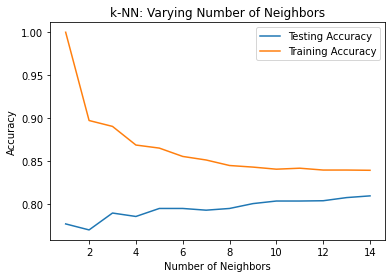

In [34]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [30]:
# evaluate test sets rmse 
rmse_test = MSE(y_test, y_pred)**(1/2)

# print test set RMSE score
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.45


<h3>Part V: Data Summary and Implications</h3>

<h3>E.  Summarize your data analysis by doing the following:</h3>

<h3>E1. Explain the accuracy and the area under the curve (AUC) of your classification model.</h3>

The provided prediction model's accuracy 

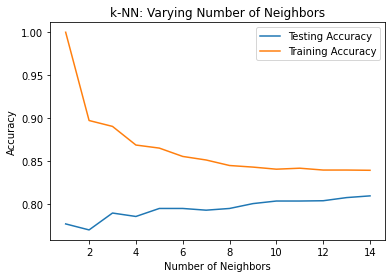

In [31]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNN(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test,y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [32]:
# Calculating roc_auc_score for KNN model
roc_auc_score(y_test, y_pred_prob)

0.8761367168376161

In [33]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Cross validation score for KNN model
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='roc_auc')

print("AUC scores computed using 5-fold cross-validation: {}".format(cv_scores))

AUC: 0.8998550854168974
AUC scores computed using 5-fold cross-validation: [0.82166419 0.81154579 0.82180525 0.8216997  0.83838028]


<h3>E2.  Discuss the results and implications of your prediction analysis.</h3>

<h3>E3.  Discuss one limitation of your data analysis.</h3>

The data does not include enough context to outline why the customer felt justified in identifying themselves as 'Techie'.

<h3>E4.  Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.</h3>

<h3>Part VI: Demonstration</h3>

<h3>F: PANOPTO</h3>

<h3>G: WEB SOURCES</h3>
<ul>
    <li>Machine Learning with scikit-learn. DataCamp. (n.d.). Retrieved July 5, 2022, from https://app.datacamp.com/learn/courses/machine-learning-with-scikit-learn </li>
</ul>

<h3>H: SOURCES</h3>
<ul>
    <li>Harrison, O. (2019, July 14). Machine learning basics with the K-nearest neighbors algorithm. Medium. Retrieved July 5, 2022, from https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761 </li>
    <li>Sakshi Gupta. (2022, June 15). Knn Machine Learning Algorithm explained. Springboard Blog. Retrieved July 5, 2022, from https://www.springboard.com/blog/data-science/knn-algorithm/ </li>
        <li>dearC. (2019, August 26). All the annoying assumptions. Medium. Retrieved July 5, 2022, from https://towardsdatascience.com/all-the-annoying-assumptions-31b55df246c3 </li>
</ul>

<h3></h3>

<h3></h3>

<h3></h3>

<h3></h3>